# Определение стоимости автомобилей

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Baxtiyor ещё раз! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**Ход исследования:**
    
1. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
Подготовьте выборки для обучения моделей.

2. Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.

3. Проанализируйте время обучения, время предсказания и качество моделей.

4. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

Примечания:
- Для оценки качества моделей применяйте метрику RMSE.
- Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del.

**Описание данных**
 
Признаки:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)

In [1]:
'''
# Установка библиотек
!pip install phik -q
!pip install scikit-learn -U -q
!pip install missingno -q
'''

'\n# Установка библиотек\n!pip install phik -q\n!pip install scikit-learn -U -q\n!pip install missingno -q\n'

In [2]:
# Стандартные библиотеки
import time

# Сторонние библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from phik import resources, phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.model_selection import (
    train_test_split, 
    RandomizedSearchCV
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMRegressor
import missingno as msno

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера </b></font>



Совет 🤔:

Смотри что   можно сделать согласно PEP-8.  Вместо
    

    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV
    

Пишем в одну строку через запятую    

    
    from sklearn.model_selection import cross_val_score,  train_test_split, ...
    
    

Если запись получается слишком длинной, это тоже противоречит PEP8, тогда скобочки:

	from sklearn.metrics import (
	   accuracy_score, 
 	   confusion_matrix, 
	   r2_score,
 	   precision_score,
 	   recall_score
	)



Во-вторых видишь у тебя есть pip install. Допустим:
    
    
    # pip install nltk # доустанавливаем необходимые библиотеки
    # pip install pywsd
    # pip install transformers  
    
    
    
Это значит что у нас сторонние библиотеки и значит    

    
    
    import transformers
    
итд
    
ставим в самый конец    
    
По аналогии можешь исправить  



Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html)  подробнее  

In [3]:
import warnings

# Подавляем предупреждения
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message="Found unknown categories.* during transform"
)

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*'squared' is deprecated in version 1.4 and will be removed in 1.6.*"
)

warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    message=".*use_inf_as_na option is deprecated.*"
)

warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*The total space of parameters.* is smaller than n_iter=.*"
)

warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*No further splits with positive gain.*"
)

## Подготовка данных

In [ ]:
autos = pd.read_csv('data/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])

     


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 

- Обрати внимание что ниже у cтолбцоы с датами тип данных определился некорректно (должен быть datetime64[ns]). Это легко поправить если использовать при чтении аргумент  parse_dates. Если у нас установлен верный тип данных, это значит что мы сможем легко вытаскивать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию 




    
    



In [5]:
display(autos.head(10))
autos.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 Выше подсказал Как можно сразу корректно прочитать

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Спасибо за совет. Исправлено.

In [6]:
# Проверка дубликатов
print('duplicates:', autos.duplicated().sum())

duplicates: 4


In [7]:
# Удаление дубликатов
autos = autos.drop_duplicates()
print('duplicates:', autos.duplicated().sum())

duplicates: 0


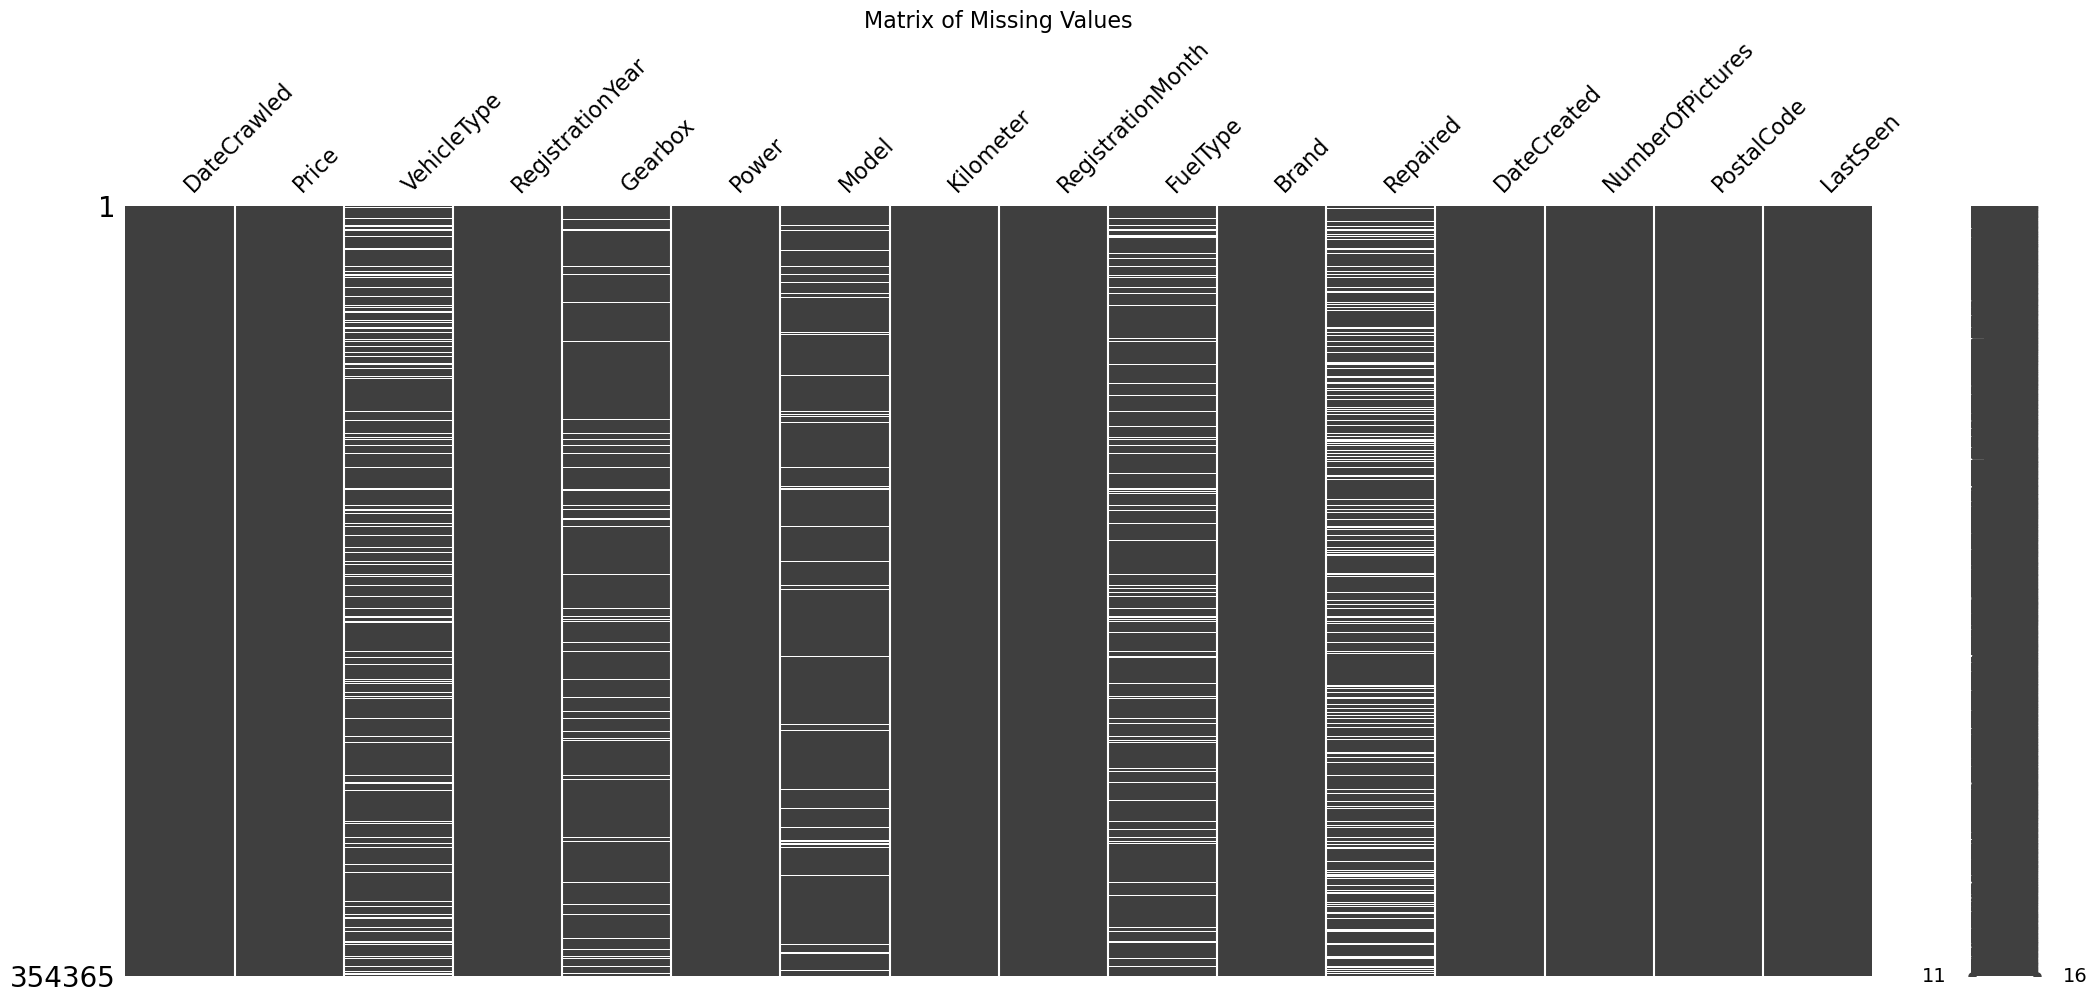

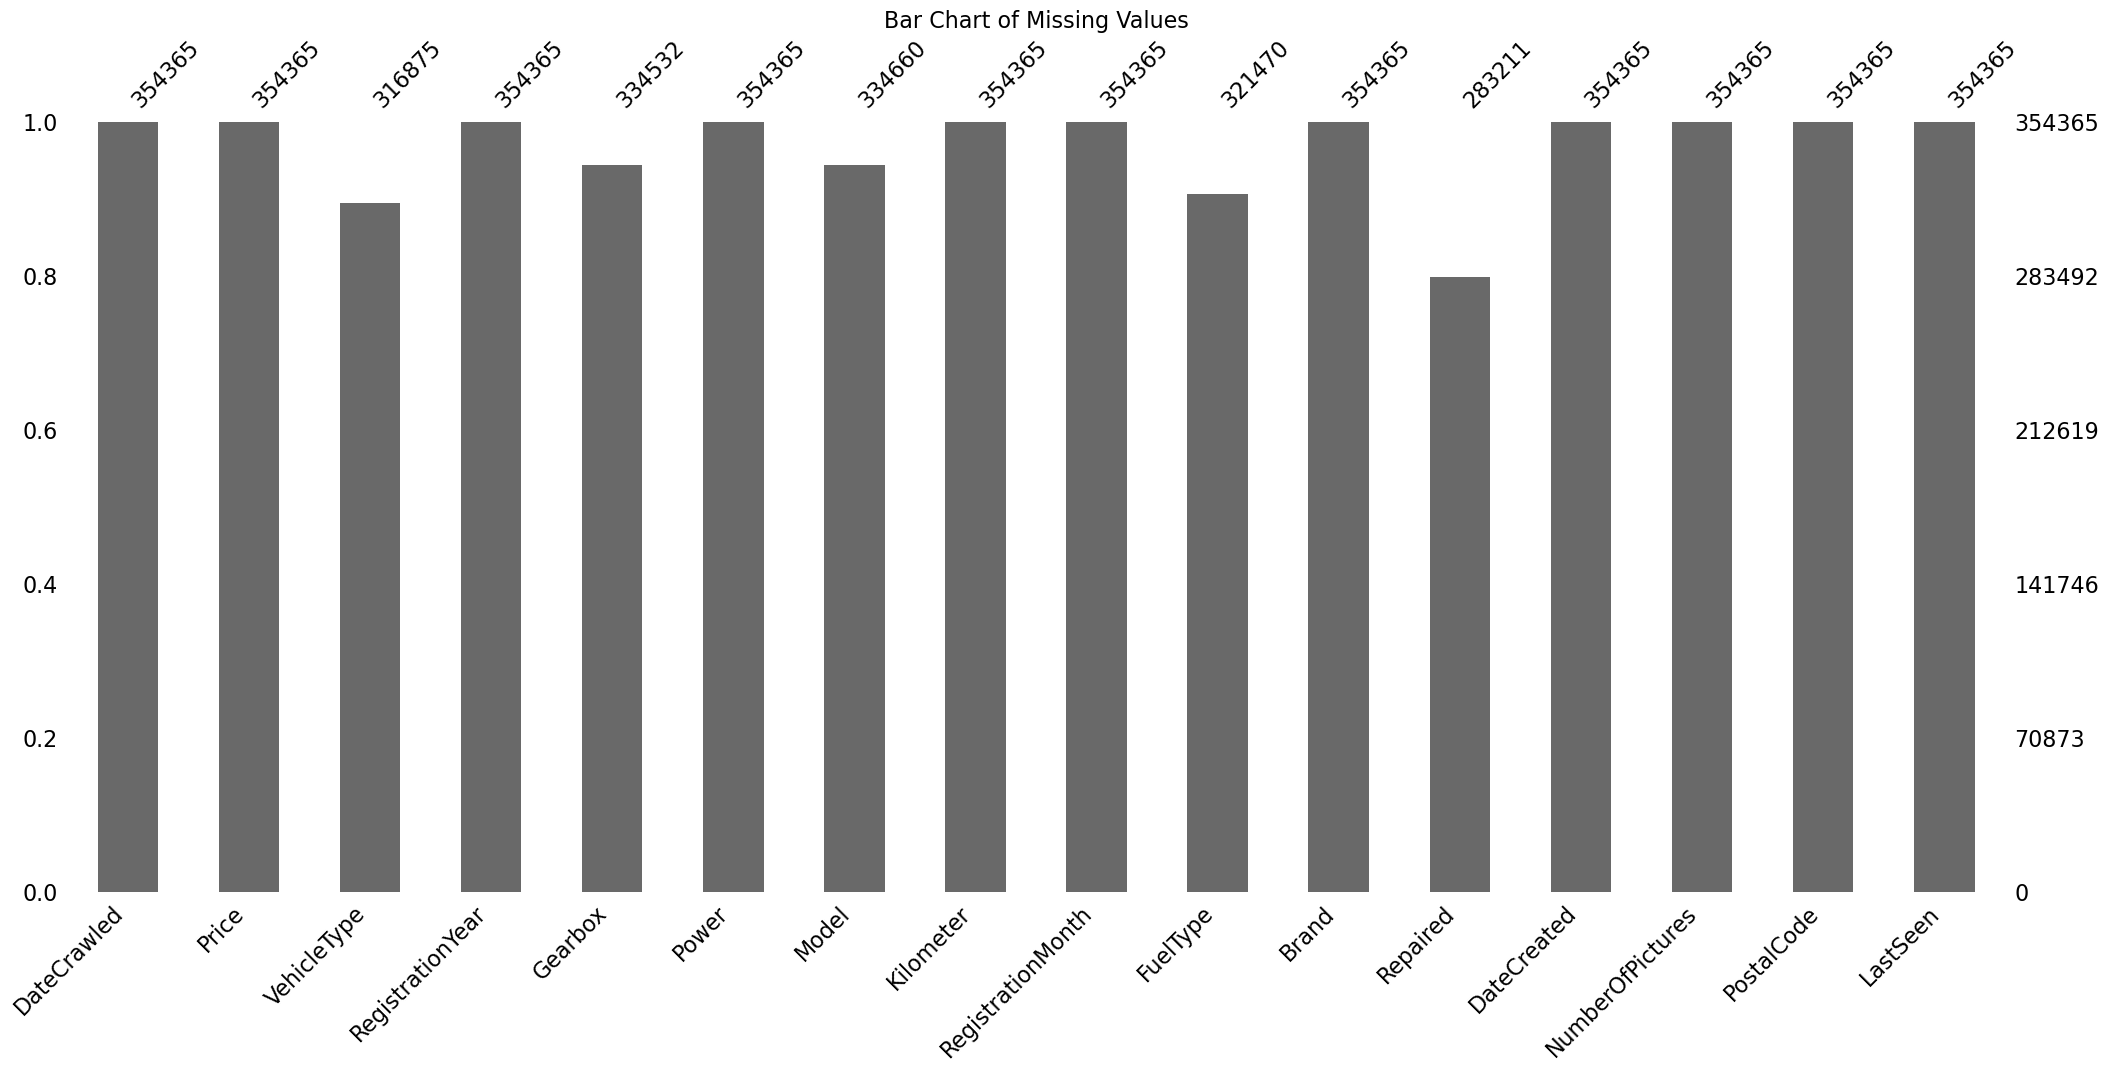

'\n# Heatmap для корреляции пропусков\nmsno.heatmap(autos)\nplt.title("Heatmap of Missing Values Correlation", fontsize=16)\nplt.show()\n'

In [8]:
# График пропусков по столбцам
msno.matrix(autos)
plt.title("Matrix of Missing Values", fontsize=16)
plt.show()

# График баров с количеством пропусков
msno.bar(autos)
plt.title("Bar Chart of Missing Values", fontsize=16)
plt.show()

'''
# Heatmap для корреляции пропусков
msno.heatmap(autos)
plt.title("Heatmap of Missing Values Correlation", fontsize=16)
plt.show()
'''

На шаге 'Подготовка данных' загрузили данные. В таблице 15 признаков и целевой признак - Price. 
Были удалены дубликаты.
Есть пропуски у некоторых признаков. 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 



Можно визуализировать пропуски с помощью библиотеки [missingno](https://www.dmitrymakarov.ru/data-analysis/nan-06/), выглядит красиво


Там кстати есть дополнительный функционал

    msno.heatmap(df)

Так можно посмотреть на корреляцию между пропусками в разных столбцах. В общем такой удобный инструмент для визуализации и анализа пропущенных значений

  

## Исследовательский анализ данных

In [9]:
# Функция для вывода графиков числовых признаков
def graph_numeric(df, col, bins=30):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Гистограмма
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=bins, kde=True)
    plt.axvline(df[col].median(), color='r', linestyle='--', label='Median')
    plt.axvline(df[col].mean(), color='g', linestyle='-', label='Mean')
    plt.title(f'Histogram of {col}')
    plt.legend()

    # Ящик с усами
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()
    print(df[col].describe())
    

def graph_discrete(df, col):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Столбчатая диаграмма
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Добавление подписей данных на столбчатую диаграмму
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Подготовка данных для круговой диаграммы
    value_counts = df[col].value_counts()
    top_5 = value_counts.nlargest(5)
    others = value_counts.iloc[5:].sum()
    pie_data = pd.concat([top_5, pd.Series(others, index=['Others'])])

    # Круговая диаграмма
    plt.subplot(1, 2, 2)
    pie_data.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')

    plt.show()
    print(df[col].describe())


# Функция дял вывода графиков категориальных признаков
def graph_cat(df, col, max_categories=10):
    # Конфигурация для отображения графиков
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 5))

    # Вывод уникальных значений
    unique_values = df[col].unique()
    print(f'Уникальные значения в столбце {col}: {unique_values}')


    # Подготовка данных
    value_counts = df[col].value_counts()
    top = value_counts.nlargest(max_categories)
    others = value_counts.iloc[max_categories:].sum()
    pie_data = pd.concat([top, pd.Series(others, index=['Others'])])

    # Круговая диаграмма
    pie_data.plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

    print(df[col].describe())


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:
 
    
Плюс за функцией, здорово что используешь seaborn, и  добавляешь   разные настройки 
    
 

In [10]:
# Определение периода для каждого временного столбца
time_columns = ['DateCrawled', 'DateCreated', 'LastSeen', 'RegistrationYear']

for col in time_columns:
    min_date = autos[col].min()
    max_date = autos[col].max()
    print(f'{col}: от {min_date} до {max_date}')

DateCrawled: от 2016-03-05 14:06:22 до 2016-04-07 14:36:58
DateCreated: от 2014-03-10 00:00:00 до 2016-04-07 00:00:00
LastSeen: от 2016-03-05 14:15:08 до 2016-04-07 14:58:51
RegistrationYear: от 1000 до 9999


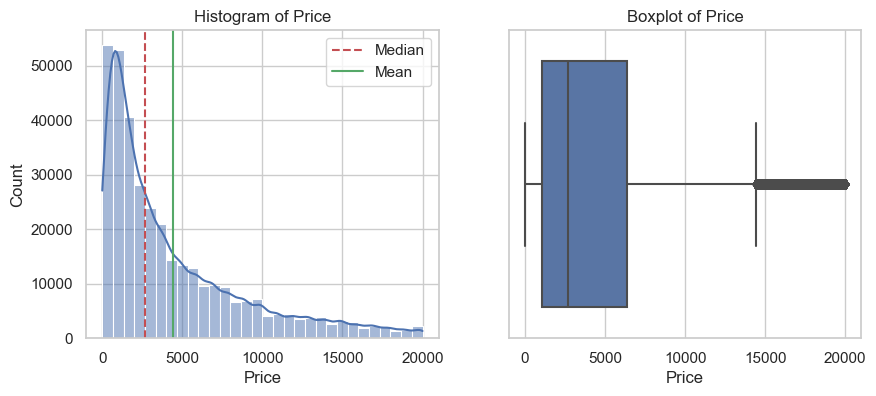

count    354365.000000
mean       4416.679830
std        4514.176349
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: Price, dtype: float64


In [11]:
graph_numeric(autos, 'Price')

Данные содержат значительное количество низких цен, небольшую часть выбросов с высокими значениями. Минимальная цена 0 некорректна, такие данные могут исказить прогноз, удалим такие данные.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>



Успех 👍:



Согласен


 

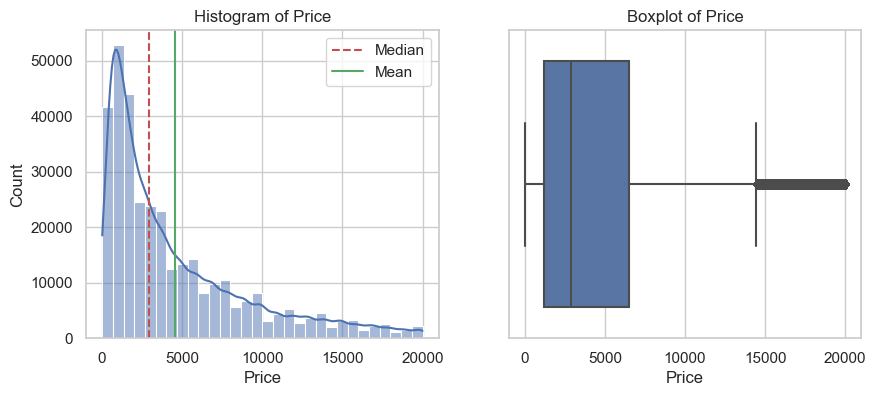

count    342253.000000
mean       4572.974881
std        4514.890416
min          11.000000
25%        1200.000000
50%        2900.000000
75%        6500.000000
max       20000.000000
Name: Price, dtype: float64


In [12]:
autos = autos[(autos['Price'] > 10)]
graph_numeric(autos, 'Price')

Уникальные значения в столбце Brand: ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'sonstige_autos' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'trabant' 'chrysler' 'jaguar' 'daewoo' 'rover' 'porsche'
 'saab' 'land_rover' 'lada']


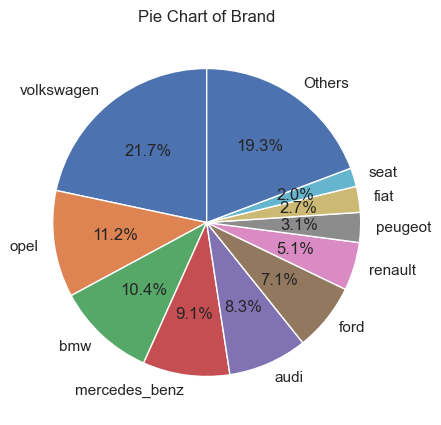

count         342253
unique            40
top       volkswagen
freq           74151
Name: Brand, dtype: object


In [13]:
graph_cat(autos, 'Brand')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍 other , для графика  


 

Уникальные значения в столбце Brand: ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'sonstige_autos' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'trabant' 'chrysler' 'jaguar' 'daewoo' 'land_rover' 'porsche'
 'saab' 'lada']


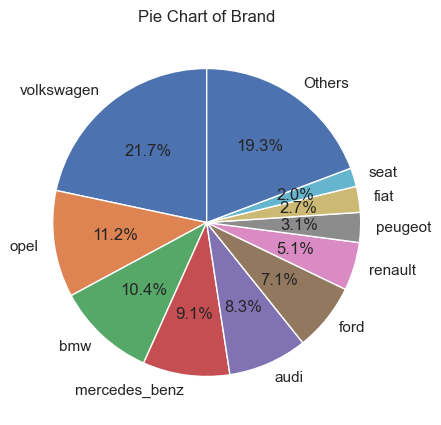

count         342253
unique            39
top       volkswagen
freq           74151
Name: Brand, dtype: object


In [14]:
autos['Brand'] = autos['Brand'].replace('rover', 'land_rover')
graph_cat(autos, 'Brand')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


 

 
    
    
У нас в данных присутствует ещё олдин скрытый дубликат. Посмотри на  'petrol' и 'gasoline', ведь это   название одного и того же в разных странах. А у тебя получается это разное, и модель для работы получит некорректные представления (Хотя некоторые студент утверждают что все индексы почтовые относятся Германии,  поэтому Возможно это не скрытый дублика, а название дизеля...)  

Уникальные значения в столбце Model: ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'other' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8'
 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort'
 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo' 'focus' 'tt'
 'corsa' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensis' 'roomster' 'sl'

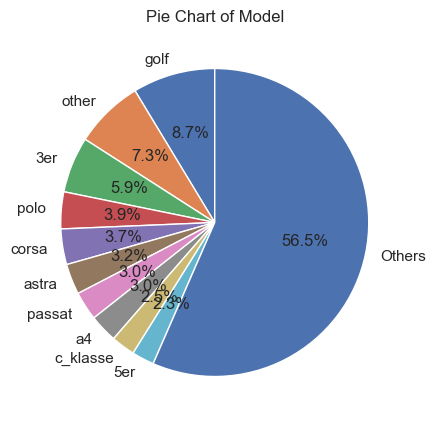

count     325022
unique       250
top         golf
freq       28160
Name: Model, dtype: object


In [15]:
graph_cat(autos, 'Model')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

У тебя тут два раза other?
 

Уникальные значения в столбце Model: ['golf' 'other' 'grand' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8' 'jetta'
 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort' 'forester'
 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo' 'focus' 'tt' 'corsa'
 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe' 'sportage'
 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3' 'almera'
 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensis' 'roomster' 'sl' 'ka

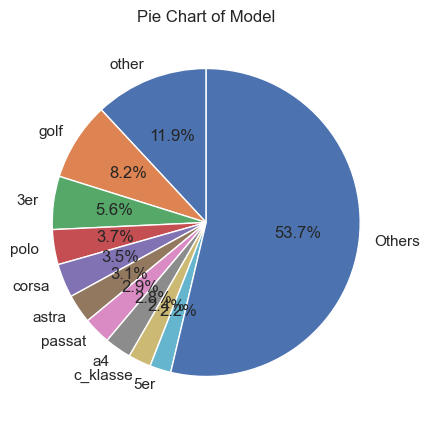

count     342253
unique       250
top        other
freq       40822
Name: Model, dtype: object


In [16]:
autos['Model'] = autos['Model'].fillna('other')
graph_cat(autos, 'Model')

Уникальные значения в столбце VehicleType: [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']


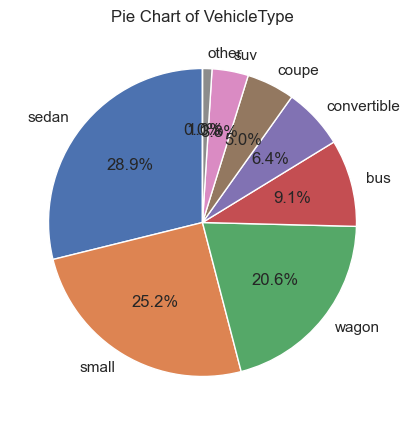

count     309051
unique         8
top        sedan
freq       89190
Name: VehicleType, dtype: object


In [17]:
graph_cat(autos, 'VehicleType')

Есть пропуски в столбце, можно заполнить категорией 'other'

Уникальные значения в столбце VehicleType: ['other' 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon']


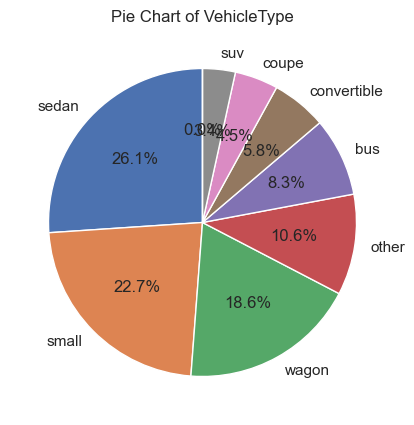

count     342253
unique         8
top        sedan
freq       89190
Name: VehicleType, dtype: object


In [18]:
autos['VehicleType'] = autos['VehicleType'].fillna('other')
graph_cat(autos, 'VehicleType')

 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


 
Вполне допустимый вариант заполнения пропусков. 


 

<div class="alert alert-warning">



Совет 🤔:

 
- Вообще работа с пропусками тема очень тонкая, ведь в любом случае будет происходить искажение данных, каждый новый датасетом скорее всего надо будет требовать какой-то свой уникальный способ работы с пропусками, а как именно - это придёт с опытом. Тут можешь посмотреть какие вообще способы и подходы можно использовать  [первая часть](https://www.dmitrymakarov.ru/data-analysis/nan-06/) ,   [вторая часть](https://www.dmitrymakarov.ru/data-analysis/nan-06-2/) 

 
 
- Хотя это лучше было сделать в pipeline, используя SimpleImpute - удобство в том что при прогнозе на реальных данных нам не пришлось бы в них заполнять пропуски, мы бы сразу применили  pipeline, в котором уже всё есть
 

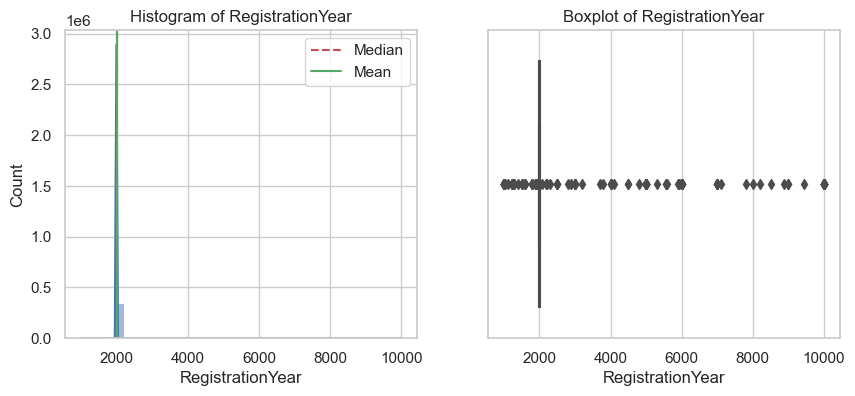

count    342253.000000
mean       2004.075733
std          77.264809
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: RegistrationYear, dtype: float64


In [19]:
graph_numeric(autos, 'RegistrationYear')

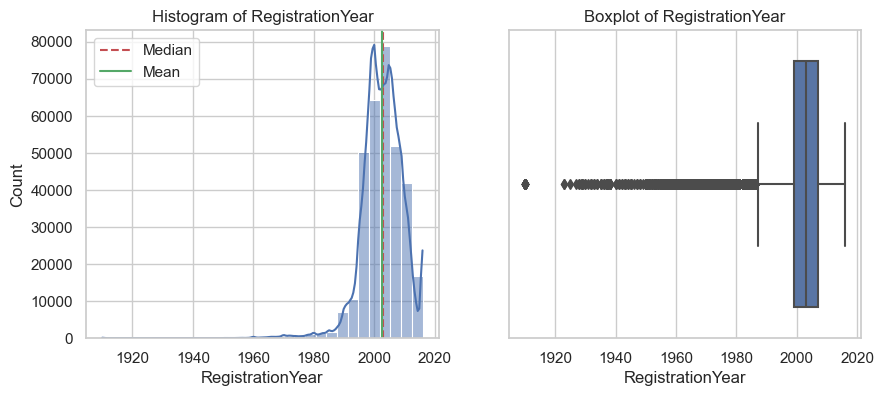

count    328494.000000
mean       2002.610042
std           6.891807
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: RegistrationYear, dtype: float64


In [20]:
# Определяем максимальный год из DateCrawled
max_year = autos['DateCrawled'].dt.year.max()

# Ограничиваем значения RegistrationYear
autos = autos[(autos['RegistrationYear'] >= 1900) & (autos['RegistrationYear'] <= max_year)]

# Проверяем результаты
graph_numeric(autos, 'RegistrationYear')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
    # Определяем максимальный год из DateCrawled

👍


 

Уникальные значения в столбце Gearbox: ['manual' 'auto' nan]


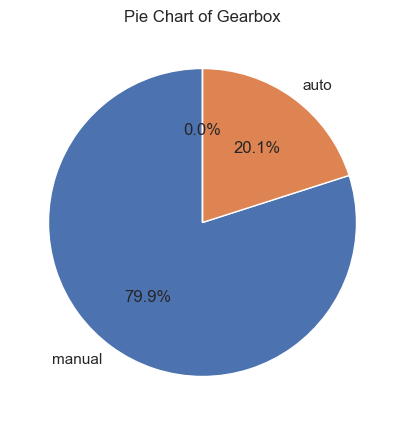

count     313326
unique         2
top       manual
freq      250483
Name: Gearbox, dtype: object


In [21]:
graph_cat(autos, 'Gearbox')

Уникальные значения в столбце Gearbox: ['manual' 'auto' 'unknown']


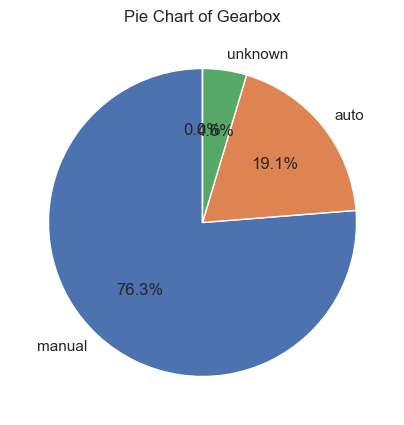

count     328494
unique         3
top       manual
freq      250483
Name: Gearbox, dtype: object


In [22]:
autos['Gearbox'] = autos['Gearbox'].fillna('unknown')
graph_cat(autos, 'Gearbox')

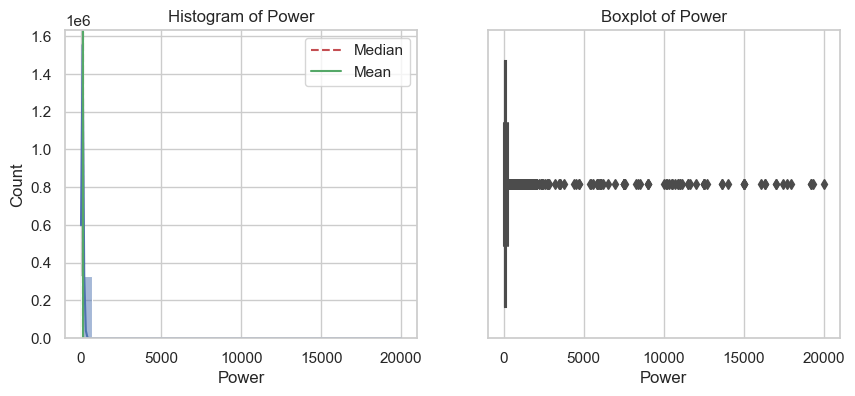

count    328494.000000
mean        112.050856
std         185.045774
min           0.000000
25%          71.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: Power, dtype: float64


In [23]:
graph_numeric(autos, 'Power')

Фильтрация аномалий: Исключаем мощности меньше 10 и больше 600. Значения за пределами заменяем на NaN для дальнейшей обработки.
Заполнение пропусков: Пропуски (включая отфильтрованные значения) заполняем средним значением мощности, рассчитанным по марке и типу автомобиля. Это позволяет учесть специфику моделей и избежать искажения данных.

Пропусков после фильтрации: 32767


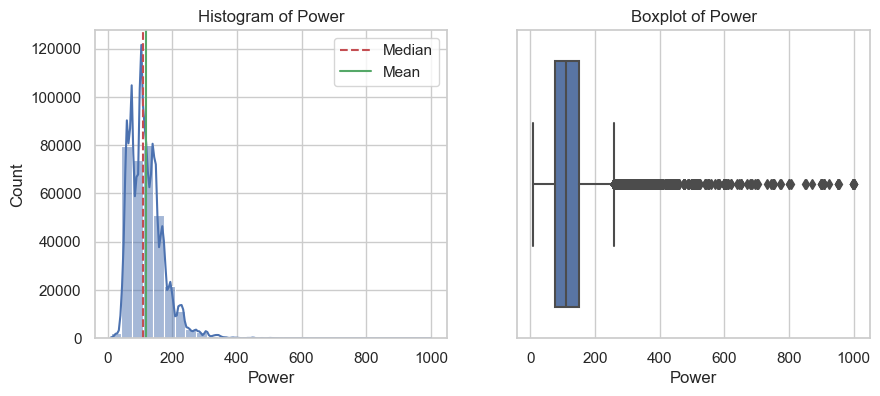

count    328494.000000
mean        120.126452
std          53.560839
min          10.000000
25%          77.000000
50%         110.000000
75%         150.000000
max        1000.000000
Name: Power, dtype: float64


In [24]:
# Устанавливаем нижний и верхний предел мощности
lower_limit = 10  # Минимальная реалистичная мощность (например, мопед, малолитражка)
upper_limit = 1000  # Максимальная реалистичная мощность

# Убираем аномалии, заменяя значения за пределами на NaN
autos['Power'] = autos['Power'].apply(lambda x: x if lower_limit <= x <= upper_limit else None)

# Проверяем количество NaN после фильтрации
print(f"Пропусков после фильтрации: {autos['Power'].isna().sum()}")

# Заполняем NaN средним значением мощности, сгруппированным по 'Brand' и 'VehicleType'
autos['Power'] = autos.groupby(['Brand', 'Model'])['Power'].transform(lambda x: x.fillna(x.mean()))
autos['Power'] = autos.groupby(['Brand', 'VehicleType'])['Power'].transform(lambda x: x.fillna(x.mean()))

# Проверяем итог
graph_numeric(autos, 'Power')

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет 🤔:   
    
    

    
 
    
    
    
Здорово Что используешь более сложную логику при замене аномалий, но по логике моделирования мы имеем информацию только о тренировочной выборке, поэтому если делать всё правильно, то мы сначала делаем сплит, затем применяем твою логику заполнение на тренировочной выборке, а затем используем ее на валидационной и тестовой выборке (тут аналогия с Scaler, когда мы делаем .fit на тренировочный  а потом .transform на валидационной\тестовой). А так как ты используешь RandomizedSearchCV, то стоит еще твою функцию преобразования засунуть в pipeline. Ниже ты используешь в pipeline Scaler чтобы избежать утчечку данных, но как нам в pipeline засунуть собственную функцию преобразования?! Можешь взять за основу [Ссылка 1](https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-polzovatelskih-preobrazovatelei-dannyh-62b2a9a80e49941961ffc7a2),
[Ссылка 2](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156). Обрати внимание что мы создаём, в котором есть наследование от TransformerMixin и BaseEstimator, именно это позволяет потом применить .fit и .transform.  

 

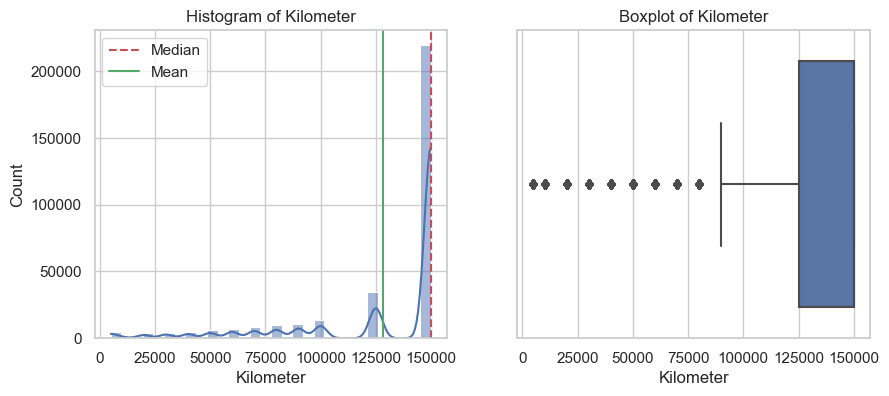

count    328494.000000
mean     128261.855620
std       37415.474343
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64


In [25]:
graph_numeric(autos, 'Kilometer')

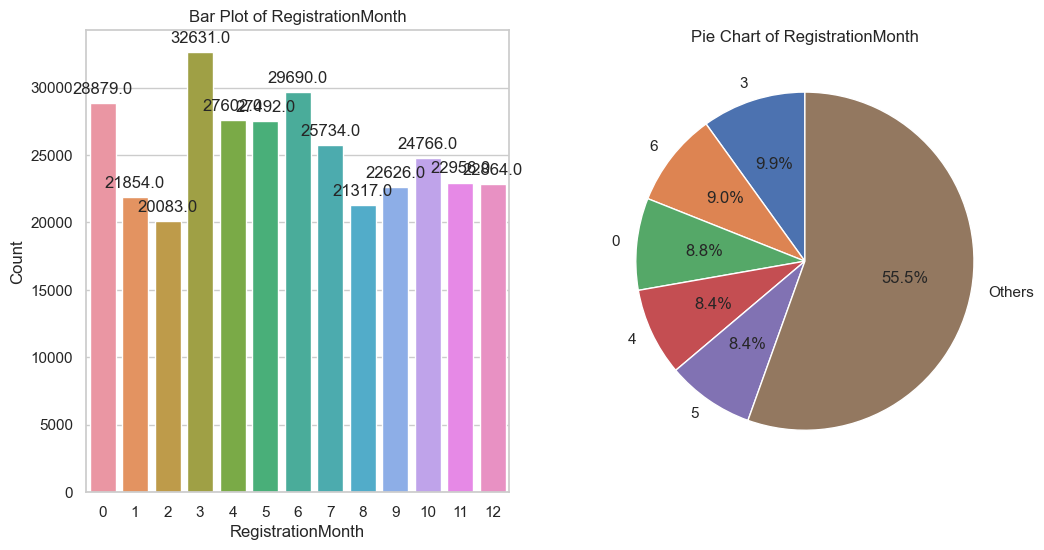

count    328494.000000
mean          5.828944
std           3.675282
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: RegistrationMonth, dtype: float64


In [26]:
graph_discrete(autos, 'RegistrationMonth')

В столбце есть не заполненные значения в виде 0. Вероятно месяц регистрация не сильно влияет на целевой признак и мы не будем использовать в моделе. Оставим пропуски как есть.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 

Уникальные значения в столбце FuelType: ['petrol' 'gasoline' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


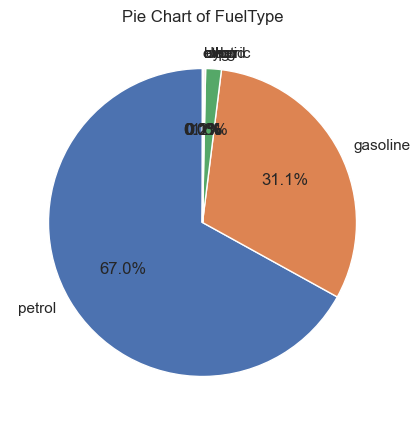

count     304810
unique         7
top       petrol
freq      204132
Name: FuelType, dtype: object


In [27]:
graph_cat(autos, 'FuelType')

Уникальные значения в столбце FuelType: ['petrol' 'other' 'lpg' 'hybrid' 'cng' 'electric']


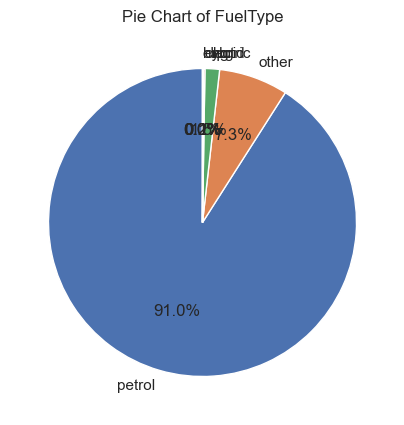

count     328494
unique         6
top       petrol
freq      298807
Name: FuelType, dtype: object


In [28]:
autos['FuelType'] = autos['FuelType'].fillna('other')
autos['FuelType'] = autos['FuelType'].replace({'gasoline': 'petrol'})
graph_cat(autos, 'FuelType')

Уникальные значения в столбце Repaired: [nan 'yes' 'no']


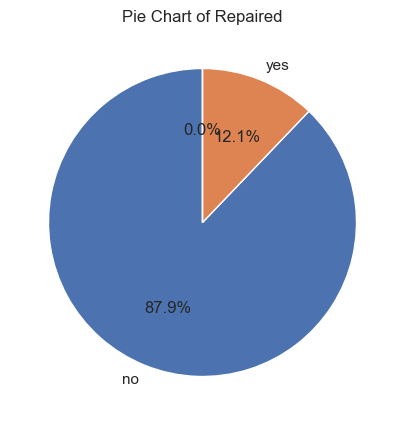

count     269318
unique         2
top           no
freq      236607
Name: Repaired, dtype: object


In [29]:
graph_cat(autos, 'Repaired')

Уникальные значения в столбце Repaired: ['unknown' 'yes' 'no']


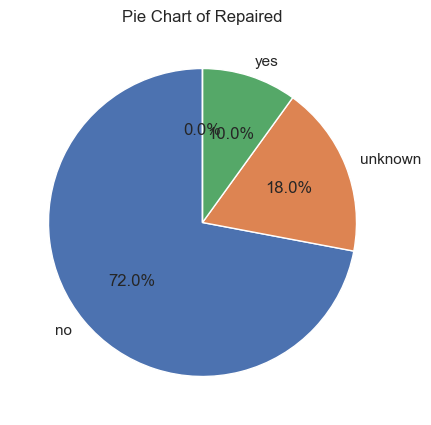

count     328494
unique         3
top           no
freq      236607
Name: Repaired, dtype: object


In [30]:
autos['Repaired'] = autos['Repaired'].fillna('unknown')
graph_cat(autos, 'Repaired')

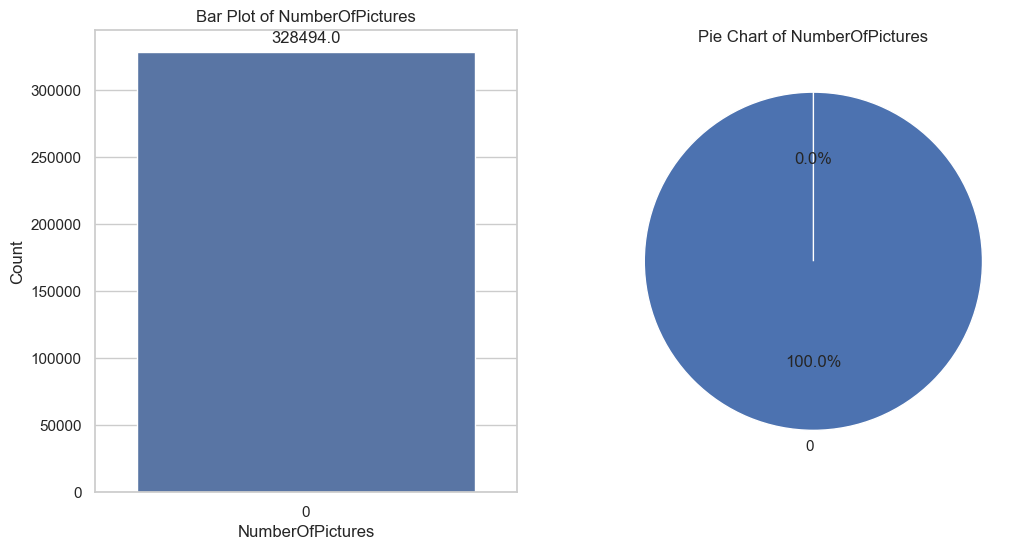

count    328494.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: NumberOfPictures, dtype: float64


In [31]:
graph_discrete(autos, 'NumberOfPictures')

Кол-во картинок везде 0, не информативный признак. 

In [32]:
# Проверка
print(autos.isna().sum())
autos.info()

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
Repaired             0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 328494 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        328494 non-null  datetime64[ns]
 1   Price              328494 non-null  int64         
 2   VehicleType        328494 non-null  object        
 3   RegistrationYear   328494 non-null  int64         
 4   Gearbox            328494 non-null  object        
 5   Power              328494 non-null  float64       
 6   Model              328494 non-null  object        
 7   Kilo

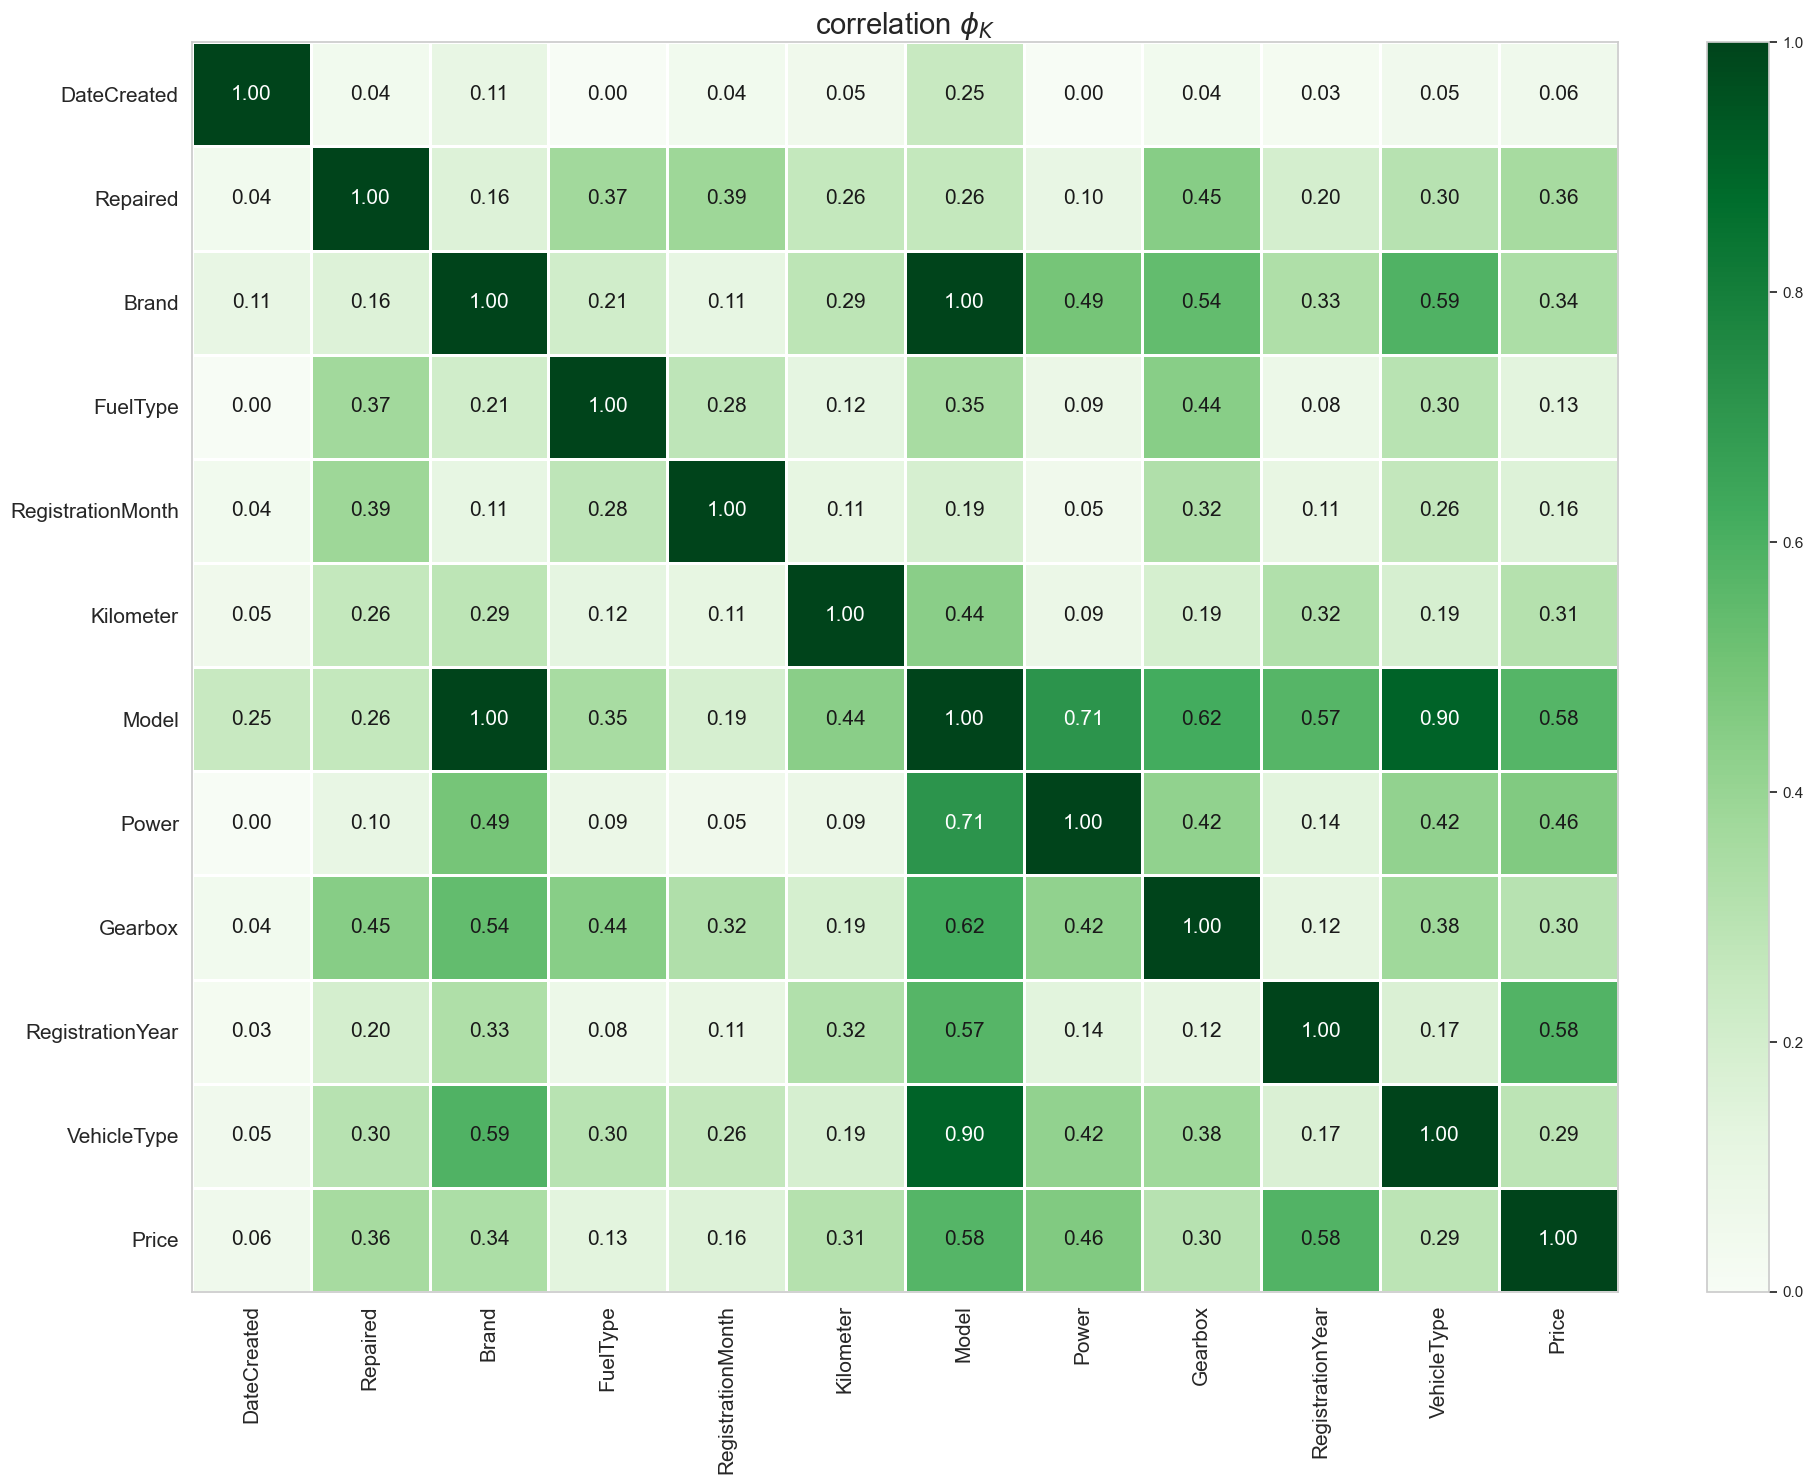

In [33]:
interval_cols = ['Price', 'RegistrationYear', 'Power', 'Kilometer', 'DaysActive']

phik_overview = phik_matrix(
    autos.drop(['NumberOfPictures', 'PostalCode', 'DateCrawled', 'LastSeen'], axis=1), interval_cols=interval_cols
)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

- Признаки с сильной корреляцией с Price: RegistrationYear, Model, Power, Brand, Repaired, и Gearbox.
- Мультиколлиенарность: Объеденить в один признак Model и Brand.
- Удаление избыточных признаков: DateCreated, CrawledMonth, и DaysActive, так как они незначительно влияют на целевой признак.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Здорово Что обратил внимание на высокую корреляцию между  Model и Brand

 

<div class="alert alert-warning">
 


Совет 🤔:


 
    
А вот по поводу удаления признаков на основе матрицы корреляций - не всегда стоит в этом деле ориентироваться на матрицу корреляций. Тем более корреляция измеряет только связь между конкретным признаком и таргетом.  А  модели могут учитывать связь между таргетом в комбинацией с какими-то признаками, то есть по отдельности признаки не информативны, а в паре очень даже. Кроме того phik, хоть создателей заявляют что может учитывать нелинейные закономерности,  всё равно не сможет учитывать связи которые сможет найти сложная нелинейная модель
    
Так что признаки конечно удалить стоит, но скорее с точки зрения логики    


In [34]:
# Создаем новый признак Brand_Model
autos['Brand_Model'] = autos['Brand'] + '_' + autos['Model']

# Удаляем старые столбцы
autos.drop(['Brand', 'Model'], axis=1, inplace=True)

Уникальные значения в столбце Brand_Model: ['volkswagen_golf' 'audi_other' 'jeep_grand' 'skoda_fabia' 'bmw_3er'
 'peugeot_2_reihe' 'ford_c_max' 'mazda_3_reihe' 'volkswagen_passat'
 'nissan_navara' 'ford_ka' 'volkswagen_polo' 'renault_twingo'
 'mercedes_benz_a_klasse' 'volkswagen_scirocco' 'bmw_5er' 'seat_arosa'
 'mercedes_benz_other' 'honda_civic' 'volkswagen_transporter' 'fiat_punto'
 'mercedes_benz_e_klasse' 'renault_clio' 'opel_kadett' 'renault_kangoo'
 'volkswagen_other' 'mini_one' 'smart_fortwo' 'bmw_1er'
 'mercedes_benz_b_klasse' 'hyundai_other' 'opel_signum' 'opel_astra'
 'audi_a8' 'volkswagen_jetta' 'honda_other' 'ford_fiesta'
 'mercedes_benz_c_klasse' 'nissan_micra' 'mercedes_benz_vito'
 'mercedes_benz_sprinter' 'alfa_romeo_156' 'fiat_other' 'ford_escort'
 'subaru_forester' 'volvo_xc_reihe' 'mitsubishi_other' 'renault_scenic'
 'audi_a4' 'opel_other' 'audi_a1' 'opel_insignia' 'opel_combo'
 'ford_focus' 'audi_tt' 'opel_corsa' 'audi_a6' 'honda_jazz' 'opel_omega'
 'mercedes_benz_s

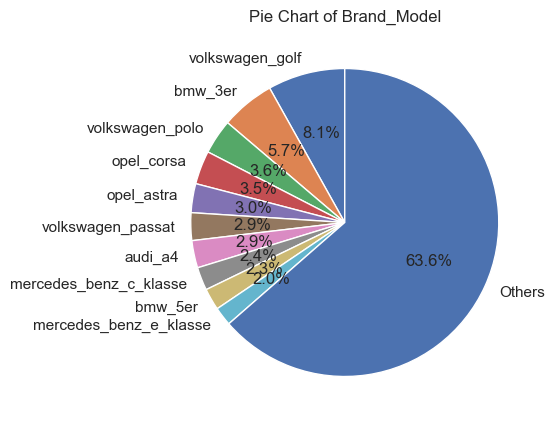

count              328494
unique                294
top       volkswagen_golf
freq                26655
Name: Brand_Model, dtype: object


In [35]:
graph_cat(autos, 'Brand_Model')

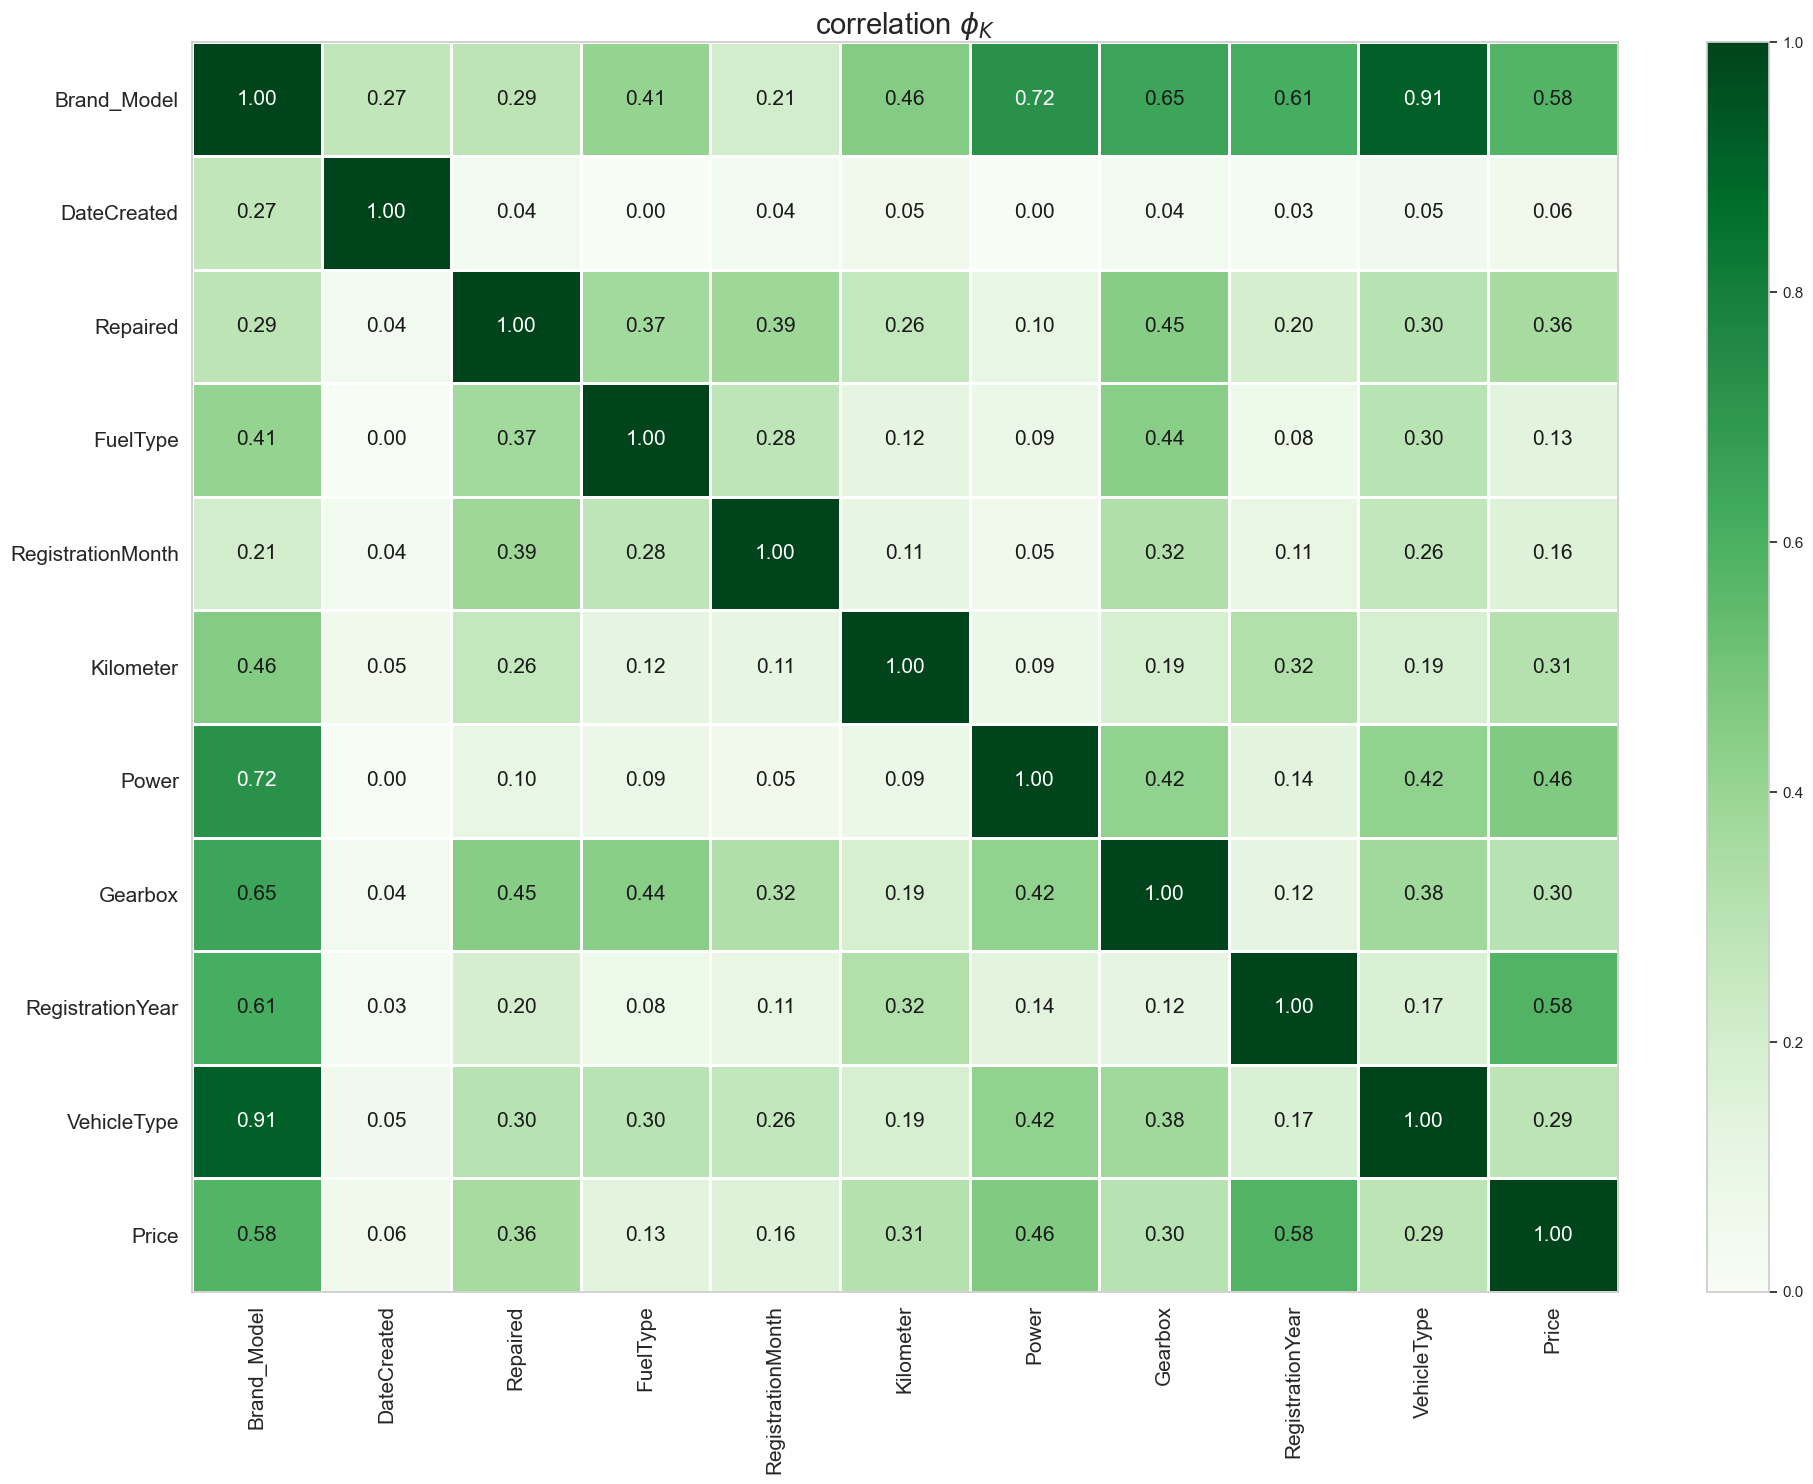

In [36]:
phik_overview = phik_matrix(
    autos.drop(['NumberOfPictures', 'PostalCode', 'DateCrawled', 'LastSeen'], axis=1), interval_cols=interval_cols
)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

В исследовательском анализе проверили все столбцы - посмотрели на распределение и особенности всех признаков. Обработали пропуски и аномалии.
Также, провели коррелиационный анализ, и определили какие признаки имеют коррелиацию с целевым признаком, а какие признаки лучше не использовать в моделе.


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 


<div class="alert alert-warning">


Совет 🤔:

 

- в этом проекте стоит вопрос о выборе модели в том числе на основе затраченного времени, можно попробовать ускориться,  ссжав датасет, приведя его в более экономный тип, с помощью функции которая гуляет на просторах интернета

    
    # Оптимизация числовых типов данных
    def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df
                                                                                                   
                                                                                                   
Проверяет минимальное и максимальное значения в столбце. Если значения могут уместиться в типе данных меньшего размера (например, np.int8 вместо np.int16), столбец конвертируется в более компактный тип данных. И для оценки стоило всё это начинать, подсчитывается размер занимаемой памяти DataFrame до и после оптимизации и выводит разницу в процентах

In [37]:
# Оптимизация числовых типов данных
def optimize_memory_usage(df: pd.DataFrame, print_size: bool = True) -> pd.DataFrame:
    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  # Типы, которые будем проверять на оптимизацию
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size:
        print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
              .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

# Применение функции
autos = optimize_memory_usage(autos)

Размер использования памяти: до 40.10 Mb - после 28.19 Mb (29.7%)


In [38]:
data = autos[
    ['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Kilometer', 'FuelType', 'Repaired', 'Brand_Model']
]

## Обучение моделей

In [39]:
# Список для сохранения результатов
results = []

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


test датасет используем в самом конце, когда тестируем лучшую модель, а пока что предлагаю посмотреть на метрику на валидации ( Можешь для этого использовать cross_val_score, это будет лучше чем создать валидационную выборку вручную) 






<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    
- Верно, что в случае использования линейной модели категориальные признаки кодированы с помощью OHE/get_dummies
    
- Правильно, что для линейной модели  проведено  шкалирование данных 


<div class="alert alert-warning">



Совет 🤔:


    
- Можешь объяснить почему для линейных модели технику  `OrdinalEncoder`  использовать нельзя, а для  деревянных моделей это не вызывает тех же проблем?

 

In [40]:
# Делим на train/test до любых трансформаций
RANDOM_STATE = 42
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Признаки
ohe_columns = ['VehicleType', 'Gearbox', 'FuelType', 'Repaired', 'Brand_Model']
num_columns = ['RegistrationYear', 'Power', 'Kilometer']

results = []

In [41]:
# ЛИНЕЙНАЯ РЕГРЕССИЯ
pipe_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('ohe', Pipeline([
            ('impute_cat', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
        ]), ohe_columns),
        ('num', 'passthrough', num_columns)  # масштабирование будет тестироваться в GridSearch
    ])),
    ('model', LinearRegression())
])

param_lr = {
    'preprocessor__num': [MinMaxScaler(), StandardScaler(), 'passthrough']
}

rs_lr = RandomizedSearchCV(pipe_lr, param_lr, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, refit=True)
rs_lr.fit(X_train, y_train)
best_lr_model = rs_lr.best_estimator_
training_time_lr = rs_lr.refit_time_

print("\n=== Linear Regression ===")
print("Лучшие параметры:", rs_lr.best_params_)
print("Средний RMSE по кросс-валидации:", np.abs(round(rs_lr.best_score_, 3)))
print(f"Время обучения на лучших параметрах: {training_time_lr:.2f} секунд")

results.append({
    "Model": "Linear Regression",
    "Params": rs_lr.best_params_,
    "CV RMSE": np.abs(round(rs_lr.best_score_, 3)),
    "Training Time (s)": round(training_time_lr, 2)
})


=== Linear Regression ===
Лучшие параметры: {'preprocessor__num': StandardScaler()}
Средний RMSE по кросс-валидации: 2732.439
Время обучения на лучших параметрах: 3.62 секунд


In [42]:
# RANDOM FOREST
pipe_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('ord', Pipeline([
            ('impute_ord', SimpleImputer(strategy='constant', fill_value='unknown')),
            ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), ohe_columns)
    ], remainder='passthrough')),
    ('model', RandomForestRegressor(random_state=RANDOM_STATE))
])

param_rf = {
    'model__max_depth': [8, 10, 12],
    'model__min_samples_split': [10, 15],
    'model__min_samples_leaf': [5, 10],
    'model__max_features': [5, 7, 10]
}

rs_rf = RandomizedSearchCV(pipe_rf, param_rf, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, refit=True)
rs_rf.fit(X_train, y_train)
best_rf_model = rs_rf.best_estimator_
training_time_rf = rs_rf.refit_time_

print("\n=== Random Forest ===")
print("Лучшие параметры:", rs_rf.best_params_)
print("Средний RMSE по кросс-валидации:", np.abs(round(rs_rf.best_score_, 3)))
print(f"Время обучения на лучших параметрах: {training_time_rf:.2f} секунд")

results.append({
    "Model": "Random Forest",
    "Params": rs_rf.best_params_,
    "CV RMSE": np.abs(round(rs_rf.best_score_, 3)),
    "Training Time (s)": round(training_time_rf, 2)
})


=== Random Forest ===
Лучшие параметры: {'model__min_samples_split': 15, 'model__min_samples_leaf': 5, 'model__max_features': 5, 'model__max_depth': 12}
Средний RMSE по кросс-валидации: 1784.258
Время обучения на лучших параметрах: 16.57 секунд


In [43]:
# LIGHTGBM
# Преобразуем категориальные признаки в категориальные типы (важно для LightGBM)
for col in ohe_columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

lgbm_model = LGBMRegressor(n_estimators=200, random_state=RANDOM_STATE)

param_lgbm = {
    'num_leaves': [20, 31, 40],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

rs_lgbm = RandomizedSearchCV(
    lgbm_model,
    param_lgbm,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    refit=True
)
rs_lgbm.fit(X_train, y_train, categorical_feature=ohe_columns)
best_lgbm_model = rs_lgbm.best_estimator_
training_time_lgbm = rs_lgbm.refit_time_

print("\n=== LightGBM ===")
print("Лучшие параметры:", rs_lgbm.best_params_)
print("Средний RMSE по кросс-валидации:", np.abs(round(rs_lgbm.best_score_, 3)))
print(f"Время обучения на лучших параметрах: {training_time_lgbm:.2f} секунд")

results.append({
    "Model": "LightGBM",
    "Params": rs_lgbm.best_params_,
    "CV RMSE": np.abs(round(rs_lgbm.best_score_, 3)),
    "Training Time (s)": round(training_time_lgbm, 2)
})

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 262795, number of used features: 8
[LightGBM] [Info] Start training from score 4632.691048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

=== LightGBM ===
Лучшие параметры: {'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.1}
Средний RMSE по кросс-валидации: 1609.817
Время обучения на лучших параметрах: 0.70 секунд


In [44]:
# Вывод таблицы результатов
results_df = pd.DataFrame(results)
display(results_df)

,Model,Params,CV RMSE,Training Time (s)
0,Linear Regression,{'preprocessor__num': StandardScaler()},2732.439,3.62
1,Random Forest,"{'model__min_samples_split': 15, 'model__min_s...",1784.258,16.57
2,LightGBM,"{'num_leaves': 40, 'max_depth': 8, 'learning_r...",1609.817,0.70


В процессе обучения были протестированы три модели: линейная регрессия, случайный лес и градиентный бустинг (LightGBM). Все модели обучались на тренировочной выборке, а оценка качества проводилась с помощью кросс-валидации (cv=5) по метрике RMSE.

- Linear Regression обучается быстро, но не может захватить сложные зависимости в данных, поэтому показывает слабый результат.
- Random Forest ансамблевая модель, показала значительно лучший результат, чем линейная регрессия, за счёт способности работать с нелинейностями и выбросами.
- LightGBM показала лучшую метрику, при этом наименьшее время обучения. Использует встроенную обработку категориальных признаков, что даёт преимущество по сравнению с Random Forest.

По результатам кросс-валидации лучшая модель — LightGBM.

## Анализ моделей

In [45]:
# ФИНАЛЬНАЯ ОЦЕНКА НА ТЕСТЕ
def final_test_evaluation(model, X_test, y_test, model_name):
    start_time_predict = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time_predict
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"\nМодель: {model_name}")
    print(f"RMSE на тестовой выборке: {rmse:.3f}")
    print(f"Время предсказания: {prediction_time:.4f} секунд")

final_test_evaluation(best_lr_model, X_test, y_test, 'Linear Regression')
final_test_evaluation(best_rf_model, X_test, y_test, 'Random Forest')
final_test_evaluation(best_lgbm_model, X_test, y_test, 'LightGBM')


Модель: Linear Regression
RMSE на тестовой выборке: 2715.288
Время предсказания: 0.1607 секунд

Модель: Random Forest
RMSE на тестовой выборке: 1786.447
Время предсказания: 0.5977 секунд

Модель: LightGBM
RMSE на тестовой выборке: 1614.342
Время предсказания: 0.2495 секунд


После выбора наилучшей модели по валидации, все три модели были протестированы на отложенной тестовой выборке, которую модель ни разу не видела ранее. Это позволяет честно оценить обобщающую способность моделей.

- LightGBM продолжает лидировать и на тестовой выборке, подтвердив своё качество.
- Модель работает быстрее, чем случайный лес, и показывает лучшую точность.
- Линейная регрессия значительно уступает по качеству, несмотря на простоту и скорость.

## Вывод

LightGBM показала лучшие результаты на тестовой выборке и является оптимальным выбором для данной задачи, так как её RMSE минимально

 
<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


 Спасибо тебе  Baxtiyor за проделанную работу, к сожалению, сейчас я не могу принять твой проект, поэтому мы с тобой еще пообщаемся )



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    

 
- чтобы не было утечки данных, хорошо бы в pipeline засунуть свою функцию заполнения пропусков/функцию создания признаков (Как это сделать написал)    
    
 
- данный проект про скорость, поэтому для моделей вроде дерево решений или случайного леса, вместо OHE, можно попробовать использовать OE,  чтобы они не сильно не путались в огромном количестве признаков которые сгенерирует OHE. К тому же они медленные.  И потом можешь убедиться что Метрика сильно не упадёт, а может даже вырастет


- есть модель которая заведомо лучше дерева решений - случайный лес. Можно сказать что это дерево решение на стероидах,  она использует идеи ансамблирования (содержит много деревьев решений) и бутстрэп выборки,  как результат - это модель которая не склона к переобучению


 

- информация о времени можно вытащить техничнее

 


Обязательное к исправлению:


    
	 

- 'petrol' и 'gasoline' то   название одного и того же в разных странах 

       
  
    
- нас интересует время обучения на лучший гиперпараметрах и время прогноза. сравнить по времени обучения с учётом перебора гиперпараметров не совсем корректно    
    
    

-  нарушена логика использования датасетов при моделировании. Тест  выборку используем только один раз, в самом конце.  Тренировочно использовать для обучения модели, метрику на ней не смотрим.  Лучшую модель для финального тестирования смотрим по валидации  

      
    
	
- для бустингов не стоит использовать OneHotEncoder/get_dummies/OrdinalEncoder, не забываем использовать встренные инструменты работы с категориальными признаками (они считаются более интеллектуальными, по крайней мере  разработчики так утверждают)  

 
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 

 

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей